SalePrice - the property's sale price in dollars. This is the target variable that we are trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale

In [50]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [51]:
test=pd.read_csv(r"/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
train=pd.read_csv(r"/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [52]:
train.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [53]:
test.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [54]:
#general info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [55]:
#general info
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [56]:
#missing values
test.isnull().sum()[test.isnull().sum() > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [57]:
#missing values
train.isnull().sum()[train.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [58]:
#descriptive statistics
test.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000  ...   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000  ...   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1458.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    472.768861    93.174777    48.313914      24.243317     1.794380   
std     217.048611   127.744882    68.883364      67.227765    20.207842   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     318.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    28.000000       0.000000     0.000000   
75%     576.000000   168.000000    72.000000       0.000000     0.000000   
max    1488.000000  1424.000000   742.000000    1012.000000   360.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  
mean     17.064428     1.744345     58.167923     6.104181  2007.769705  
std      56.609763    30.491646    630.806978     2.722432     1.301740  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  17000.000000    12.000000  2010.000000  

[8 rows x 37 columns]

In [59]:
#descriptive statistics
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [60]:
# Data preprocessing and exploratory data analysis

<Axes: >

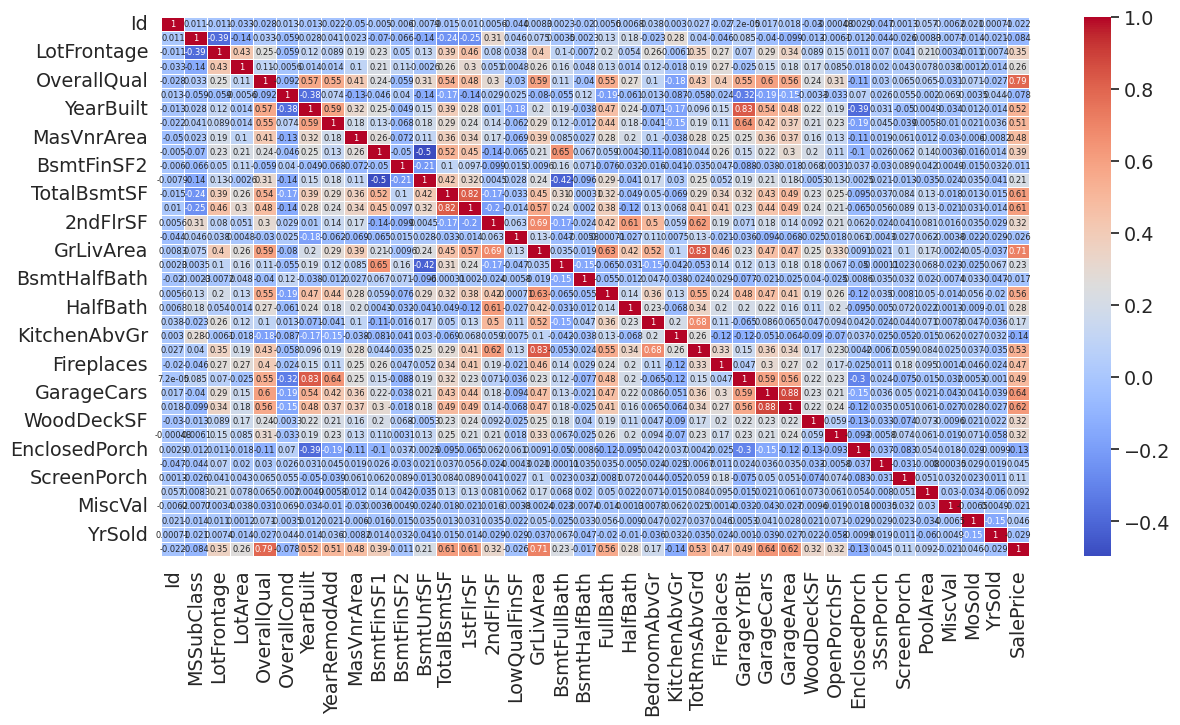

In [61]:
n_train = train.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(14, 7))
sns.heatmap(n_train.corr(), annot=True, annot_kws={"size":6}, cmap='coolwarm', linewidths=.5)



<Axes: >

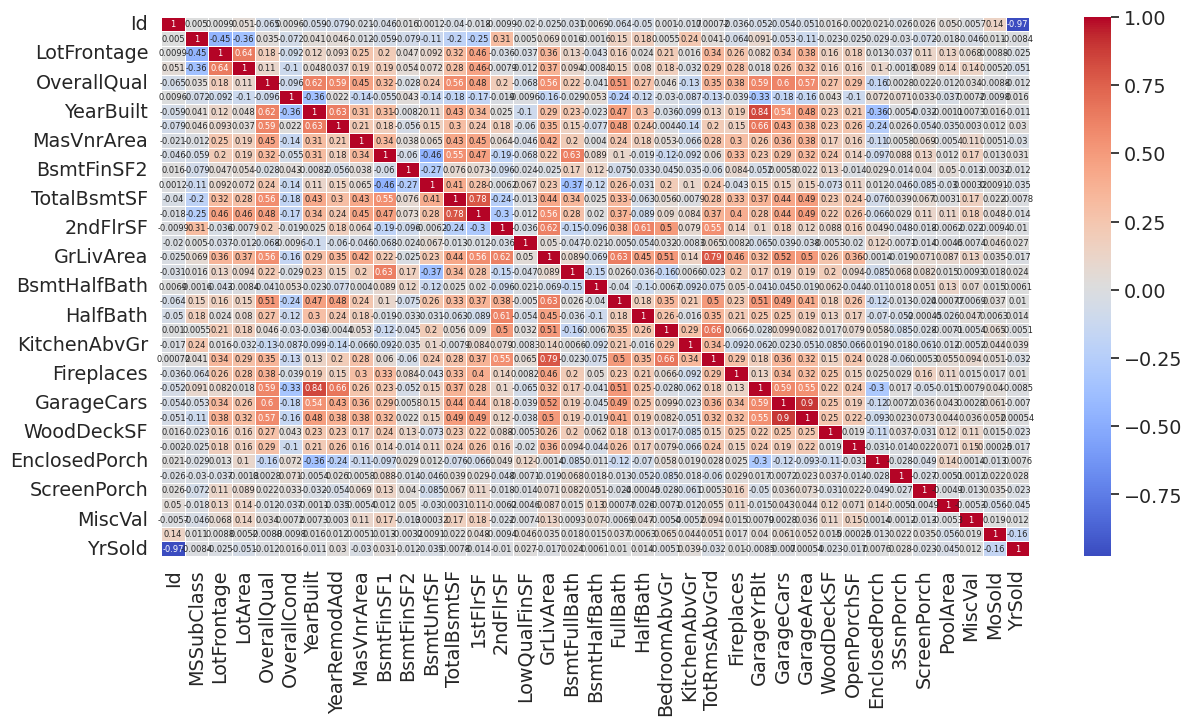

In [62]:
n_test = test.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(14, 7))
sns.heatmap(n_test.corr(), annot=True, annot_kws={"size":6}, cmap='coolwarm', linewidths=.5)


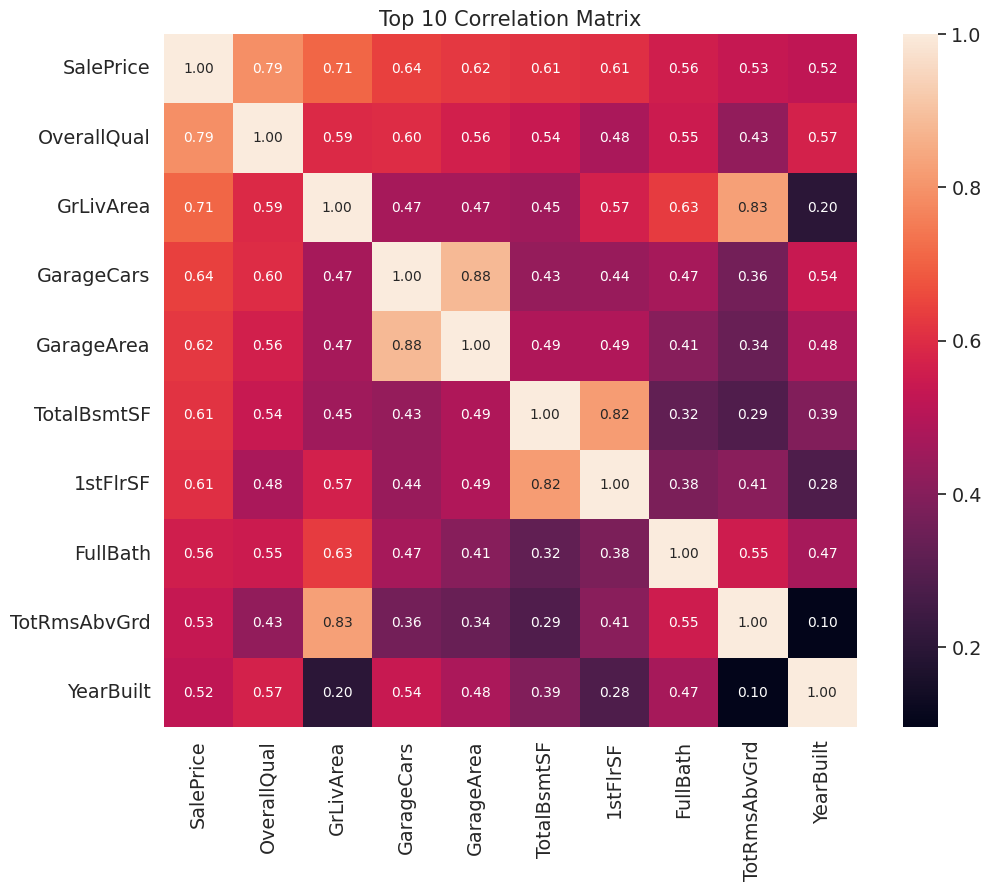

In [63]:
# Calculating the correlation matrix
correlation_matrix = n_train.corr()

# Picking the top 10 features that are most correlated with SalePrice
cols = correlation_matrix.nlargest(10, 'SalePrice')['SalePrice'].index

# Calculating the correlation coefficient for these features
cm = np.corrcoef(train[cols].values.T)

# Setting up the seaborn style
sns.set(font_scale=1.25)
plt.figure(figsize=(12, 9))

# Plotting the heatmap
heatmap = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('Top 10 Correlation Matrix')
plt.show()

/tmp/ipykernel_32/3681551257.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], hist=False, kde=True, color='red')


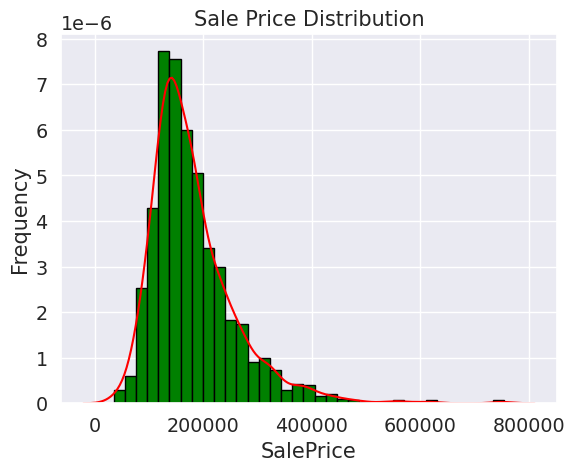

In [64]:
plt.hist(train['SalePrice'], bins=35, color='green', edgecolor='black', density=True)
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Sale Price Distribution')
sns.distplot(train['SalePrice'], hist=False, kde=True, color='red')

plt.show()

 skew in SalePrice to the right
 
    

Text(0.5, 1.0, 'Scatter Plot of GrLivArea vs. SalePrice')

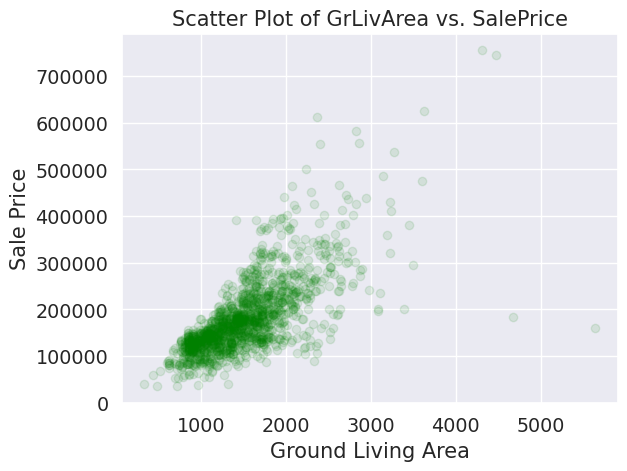

In [65]:
plt.scatter(train['GrLivArea'], train['SalePrice'], alpha=0.1, color='green')
plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')
plt.title('Scatter Plot of GrLivArea vs. SalePrice')

Text(0.5, 1.0, 'Scatter Plot of OverallQual vs. SalePrice')

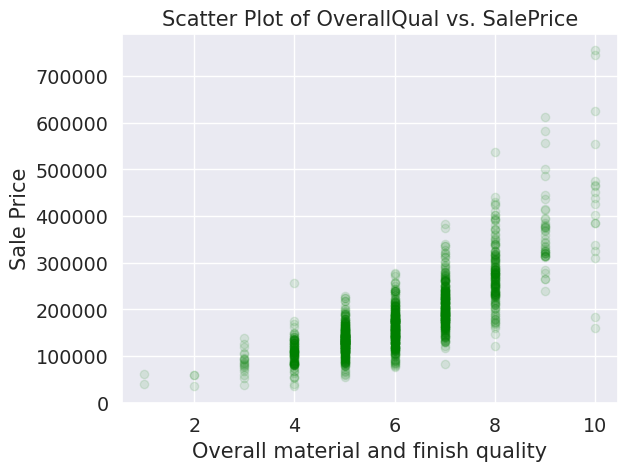

In [66]:
plt.scatter(train['OverallQual'], train['SalePrice'], alpha=0.1, color='green')
plt.xlabel('Overall material and finish quality')
plt.ylabel('Sale Price')
plt.title('Scatter Plot of OverallQual vs. SalePrice')

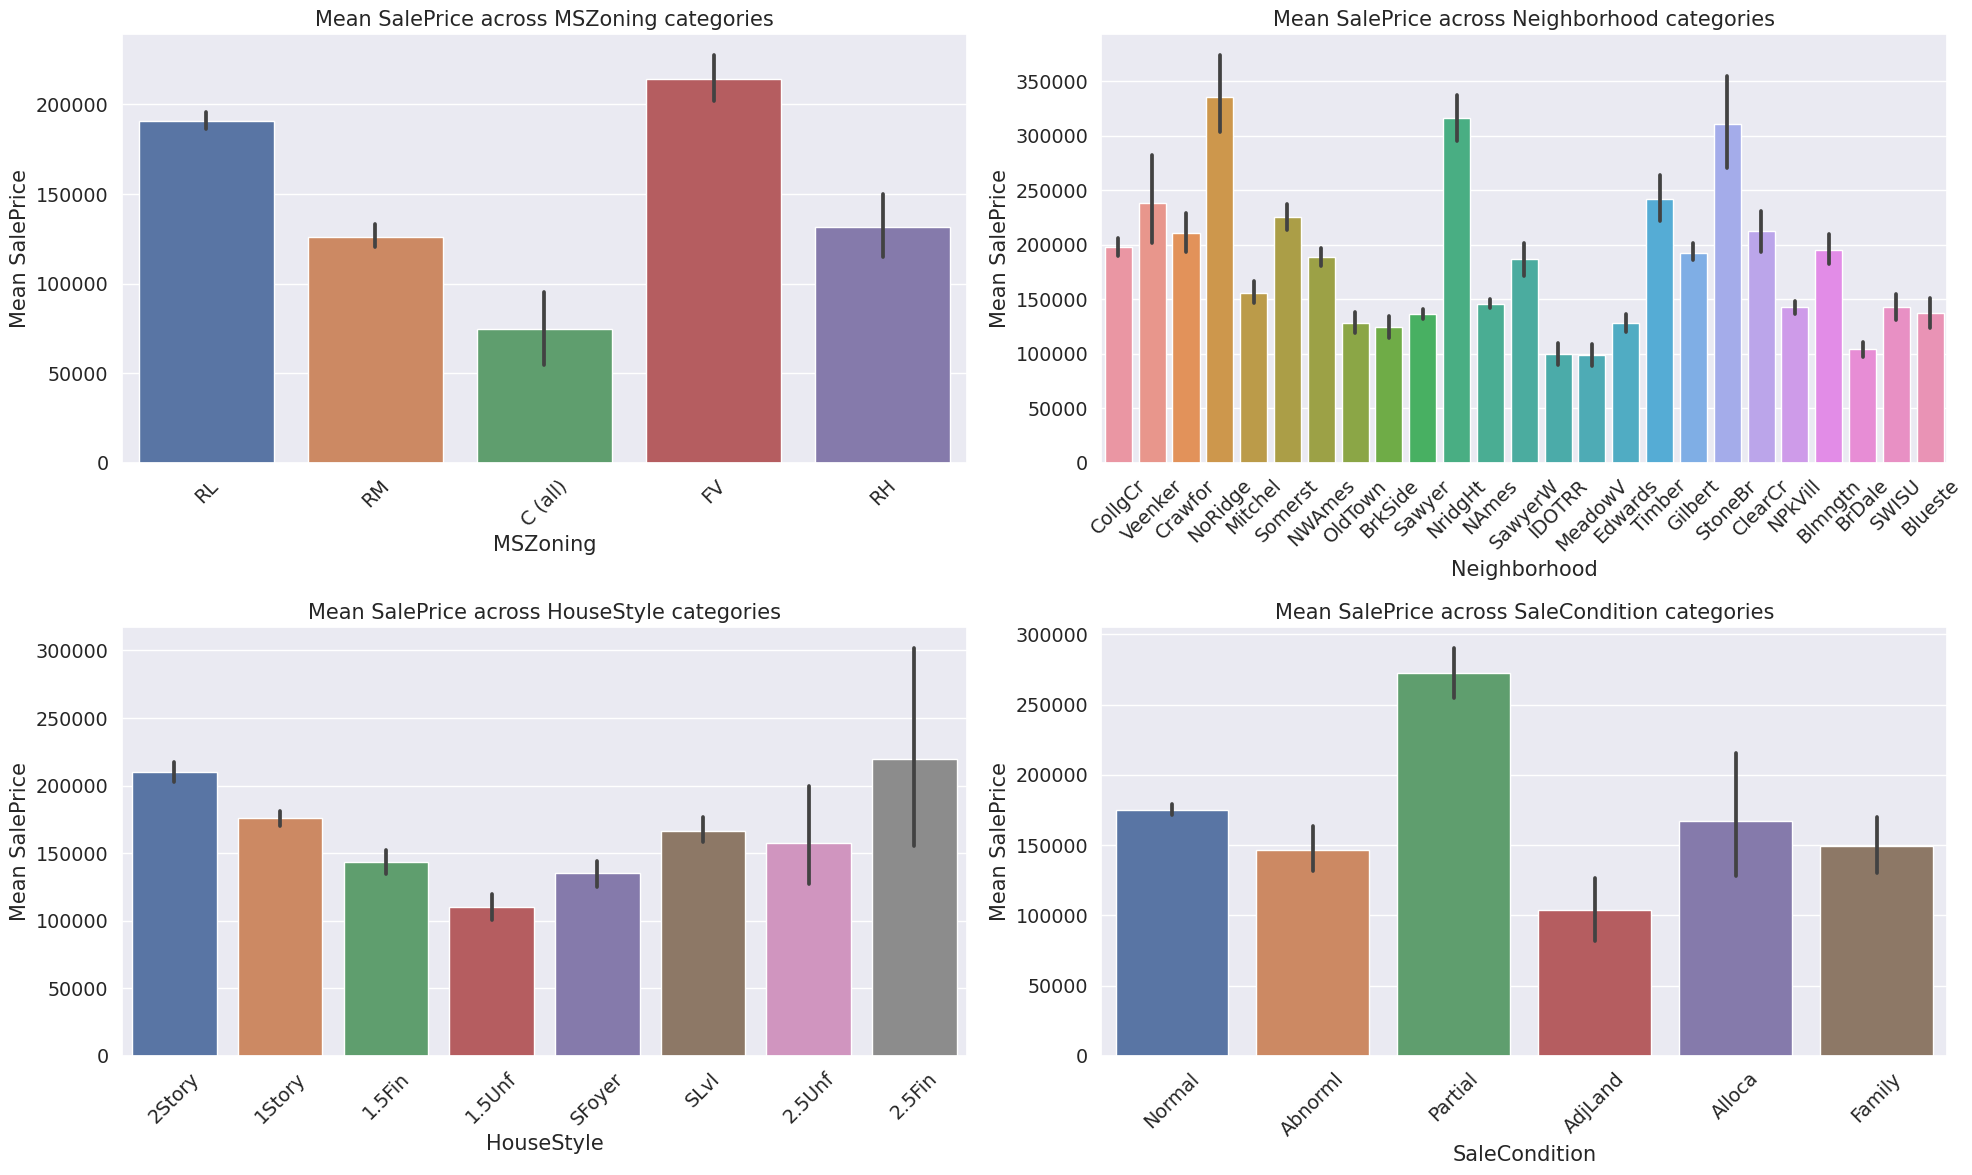

In [67]:
# List of categorical features to visualize
categorical_features = ['MSZoning', 'Neighborhood', 'HouseStyle', 'SaleCondition']

# Setting up the figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

# Iterating over the features to plot bar plots
for i, feature in enumerate(categorical_features):
    sns.barplot(x=feature, y='SalePrice', data=train, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Mean SalePrice across {feature} categories')
    axes[i//2, i%2].set_ylabel('Mean SalePrice')
    axes[i//2, i%2].set_xlabel(feature)
    axes[i//2, i%2].tick_params(axis='x', rotation=45)

# Adjusting the layout
plt.tight_layout()
plt.show()

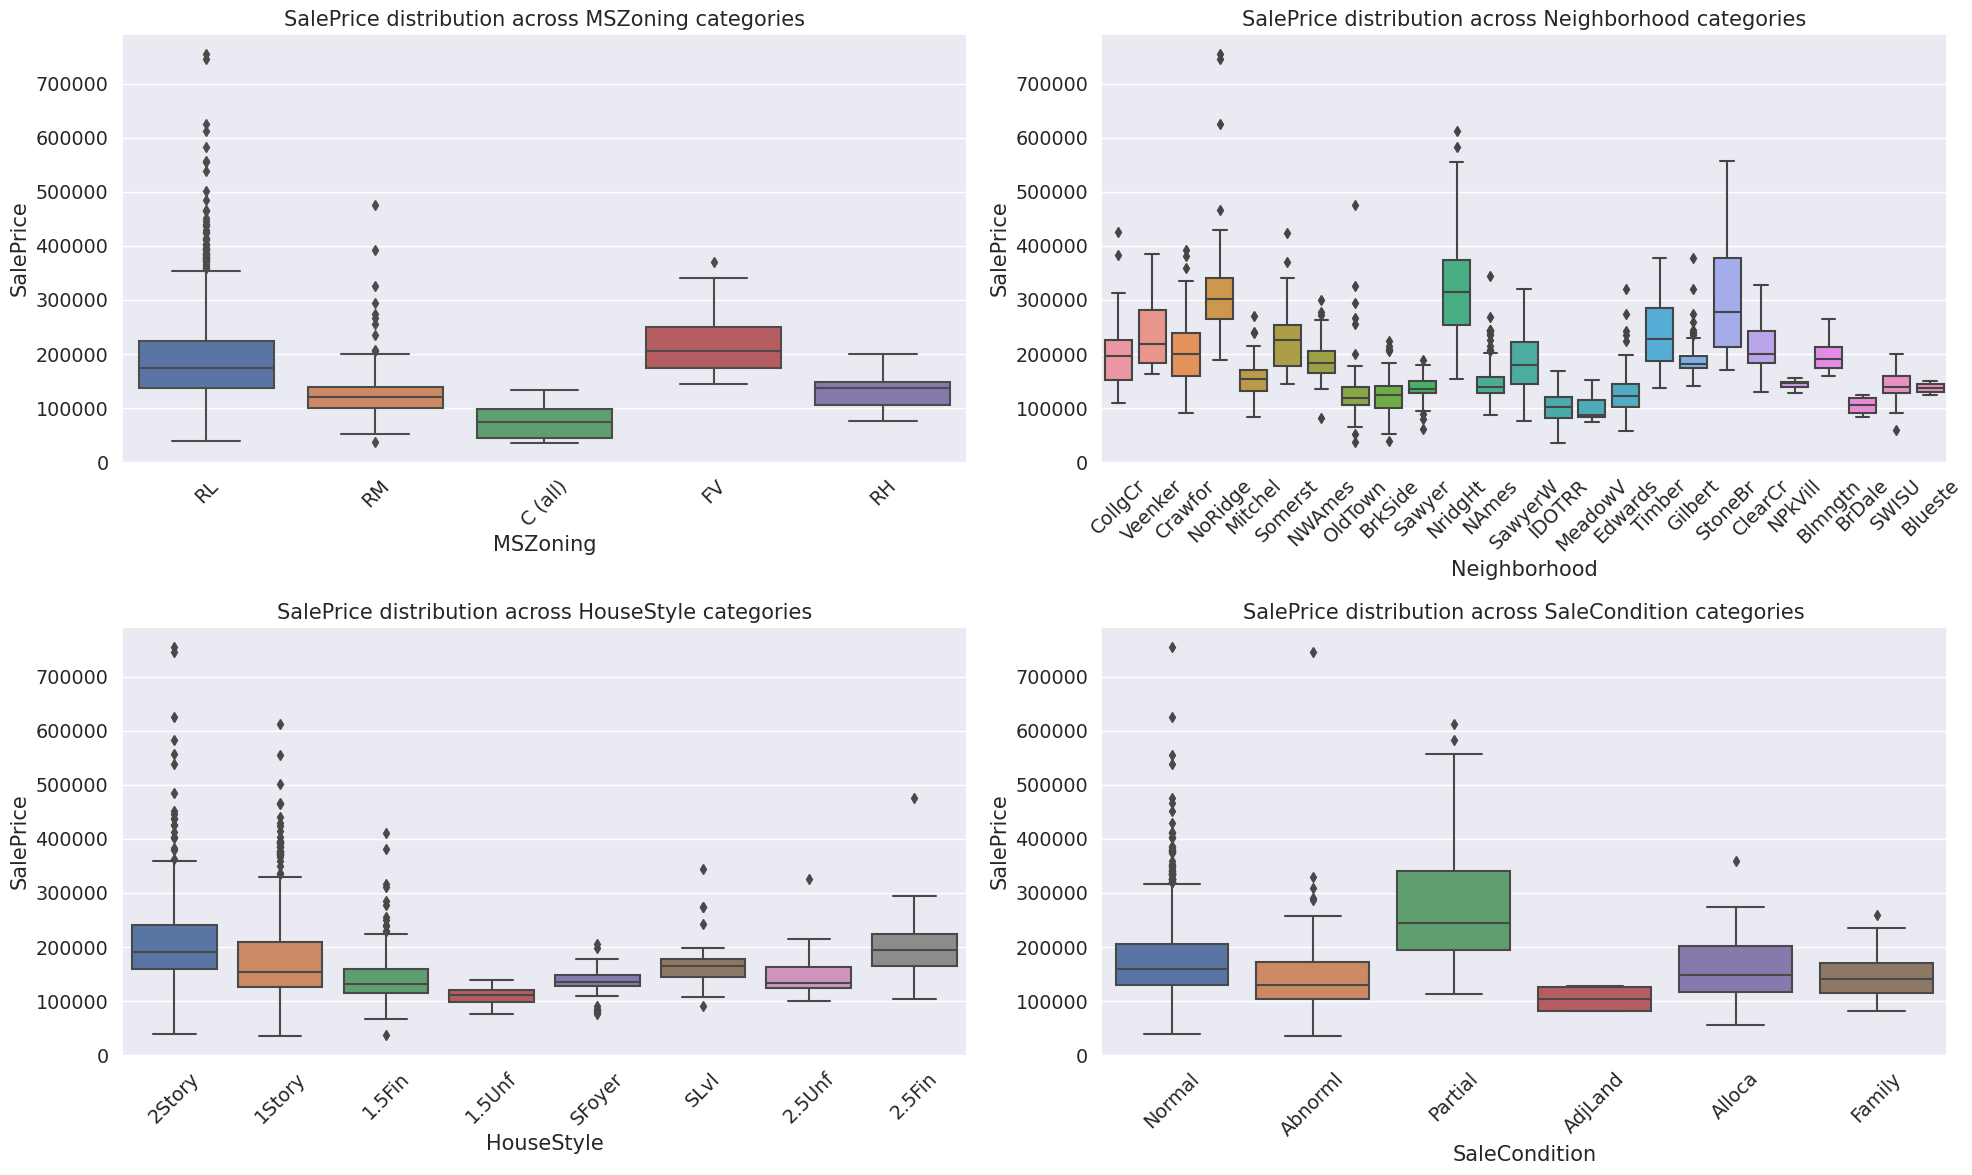

In [68]:
# Setting up the figure for box plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

# Iterating over the features to plot box plots
for i, feature in enumerate(categorical_features):
    sns.boxplot(x=feature, y='SalePrice', data=train, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'SalePrice distribution across {feature} categories')
    axes[i//2, i%2].set_ylabel('SalePrice')
    axes[i//2, i%2].set_xlabel(feature)
    axes[i//2, i%2].tick_params(axis='x', rotation=45)

# Adjusting the layout
plt.tight_layout()
plt.show()

In [69]:
categorical_cols = train.select_dtypes(include=['object']).columns.tolist()
print(categorical_cols)
print('No of cols: ' + str(len(categorical_cols)))

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
No of cols: 43


In [70]:
numerical_cols = train.select_dtypes(exclude=['object']).columns.tolist()
print(numerical_cols)
print('No of cols: ' + str(len(numerical_cols)))

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
No of cols: 38


MSSubClass appears to be a discrete features but is infact a nominal one


In [71]:
train['MSSubClass'] = train['MSSubClass'].astype('str')
test['MSSubClass'] = test['MSSubClass'].astype('str')

numerical_cols.remove('MSSubClass')
categorical_cols.append('MSSubClass')


In [72]:
show = True

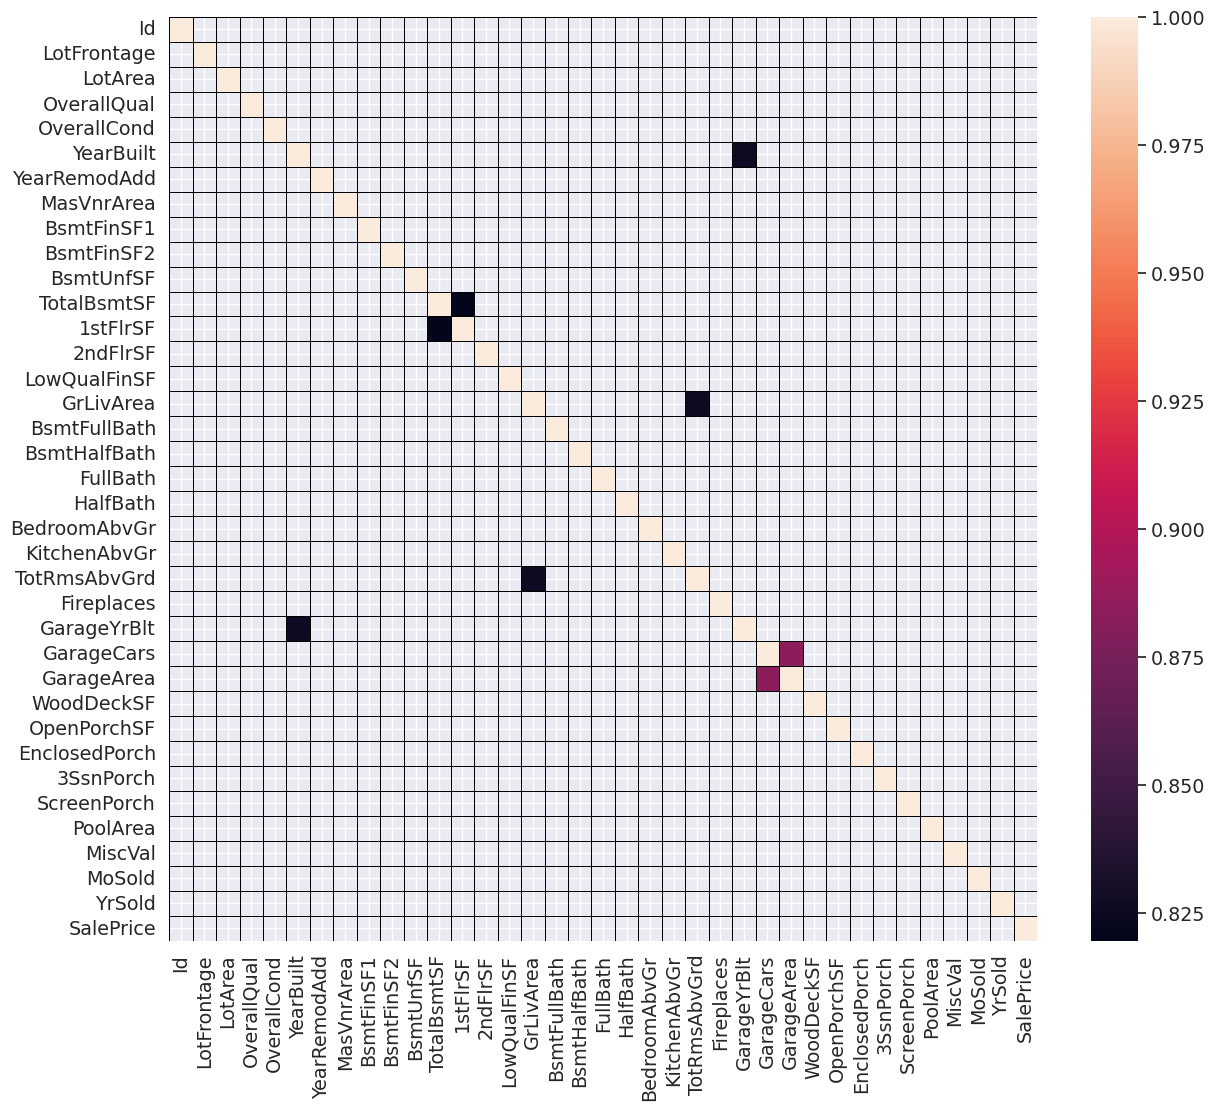

In [73]:
def plot_num_corr(show):
    if(show==True):
        plt.figure(figsize=(14,12))
        correlation = train[numerical_cols].corr()
        sns.heatmap(correlation, mask = correlation <0.8,linecolor='black',linewidth=.5)
plot_num_corr(show)

GarageYrBlt and YearBuilt

1stFlrSF and TotalBsmtSF

GarageArea and GarageCars

TotRmsAbvGrd and GrLivArea

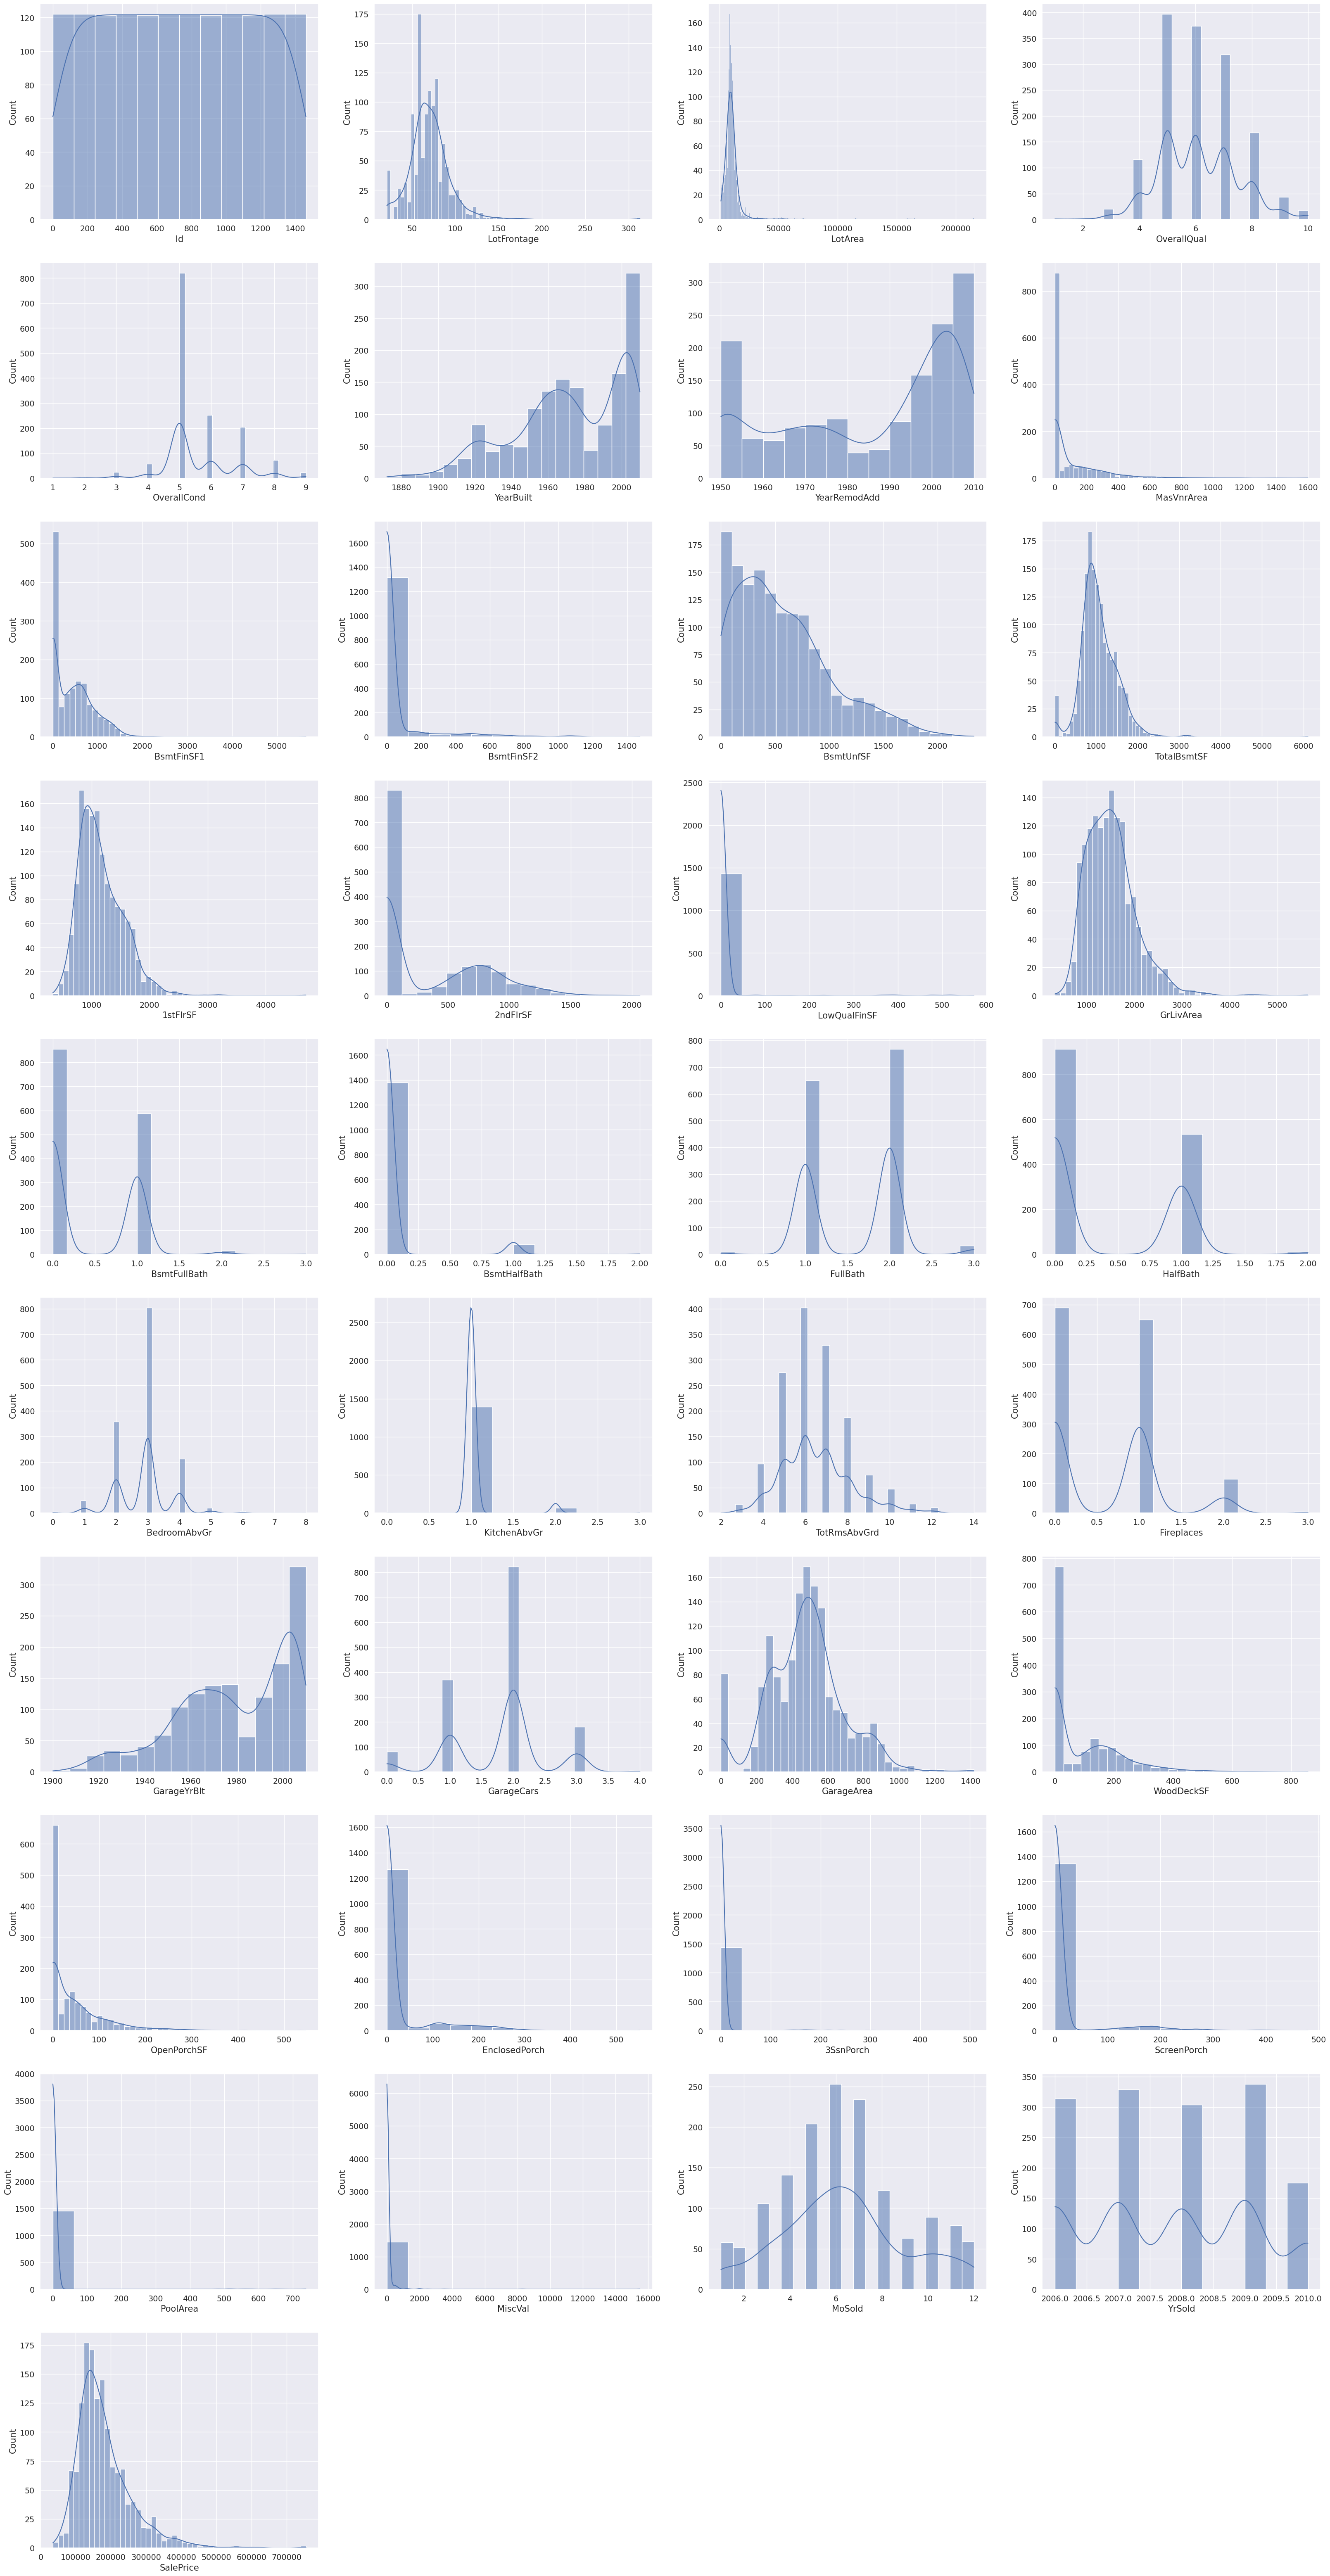

In [74]:
def plot_num_hist(show):
    if(show==True):
        fig = plt.figure(figsize = (40,80))
        ax = []
        for i,val in enumerate(numerical_cols):
            ax.append(fig.add_subplot(10,4,i+1))
            ax.append(sns.histplot(train[val].dropna(),kde = True))
        plt.show()
        fig.tight_layout()
plot_num_hist(show)

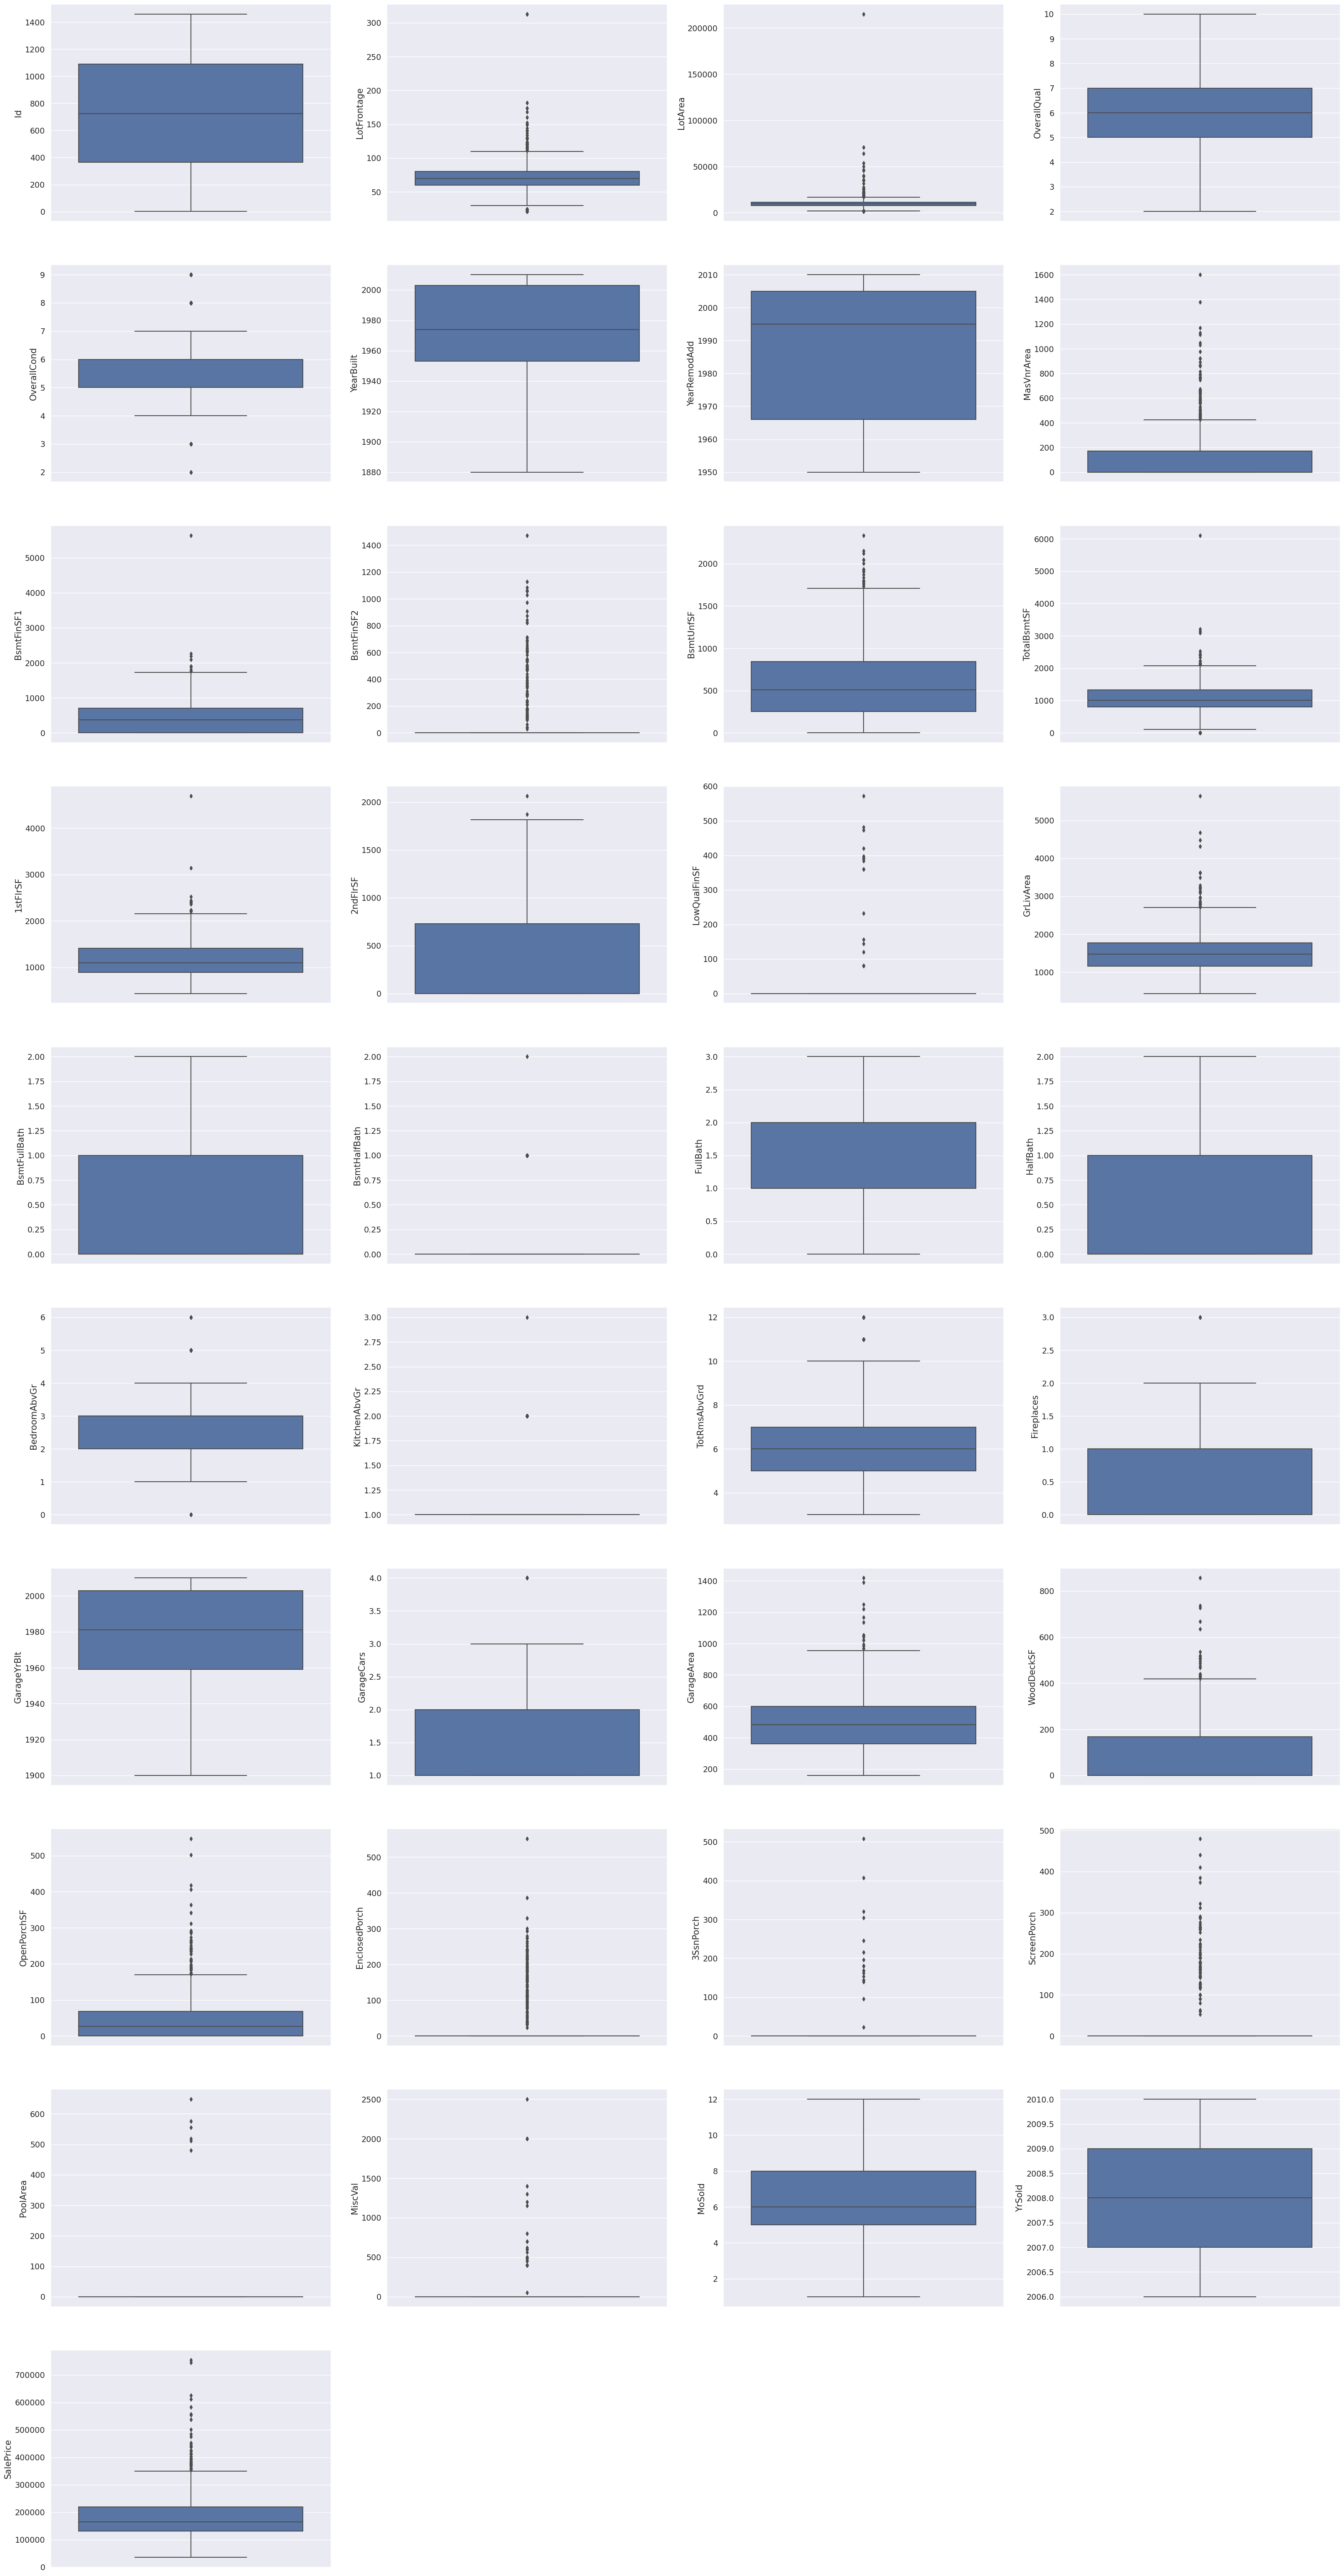

In [75]:
def plot_num_box(show):
    if(show==True):
        fig = plt.figure(figsize = (40,80))
        ax = []
        for i,val in enumerate(numerical_cols):
            ax.append(fig.add_subplot(10,4,i+1))
            ax.append(sns.boxplot(y=val, data = train[numerical_cols].dropna()))
        plt.show()
        fig.tight_layout()
plot_num_box(show)

In [76]:
#Look for quasi-constant features 


overfit_num = []
for i in numerical_cols:
    counts = train[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(train) * 100 > 95:
        overfit_num.append(i)

overfit_num = list(overfit_num)
print(overfit_num)



['LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal']


In [77]:
overfit_cat = []
for i in categorical_cols:
    counts = train[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(train) * 100 > 95:
        overfit_cat.append(i)

overfit_cat = list(overfit_cat)
print(overfit_cat)

['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']


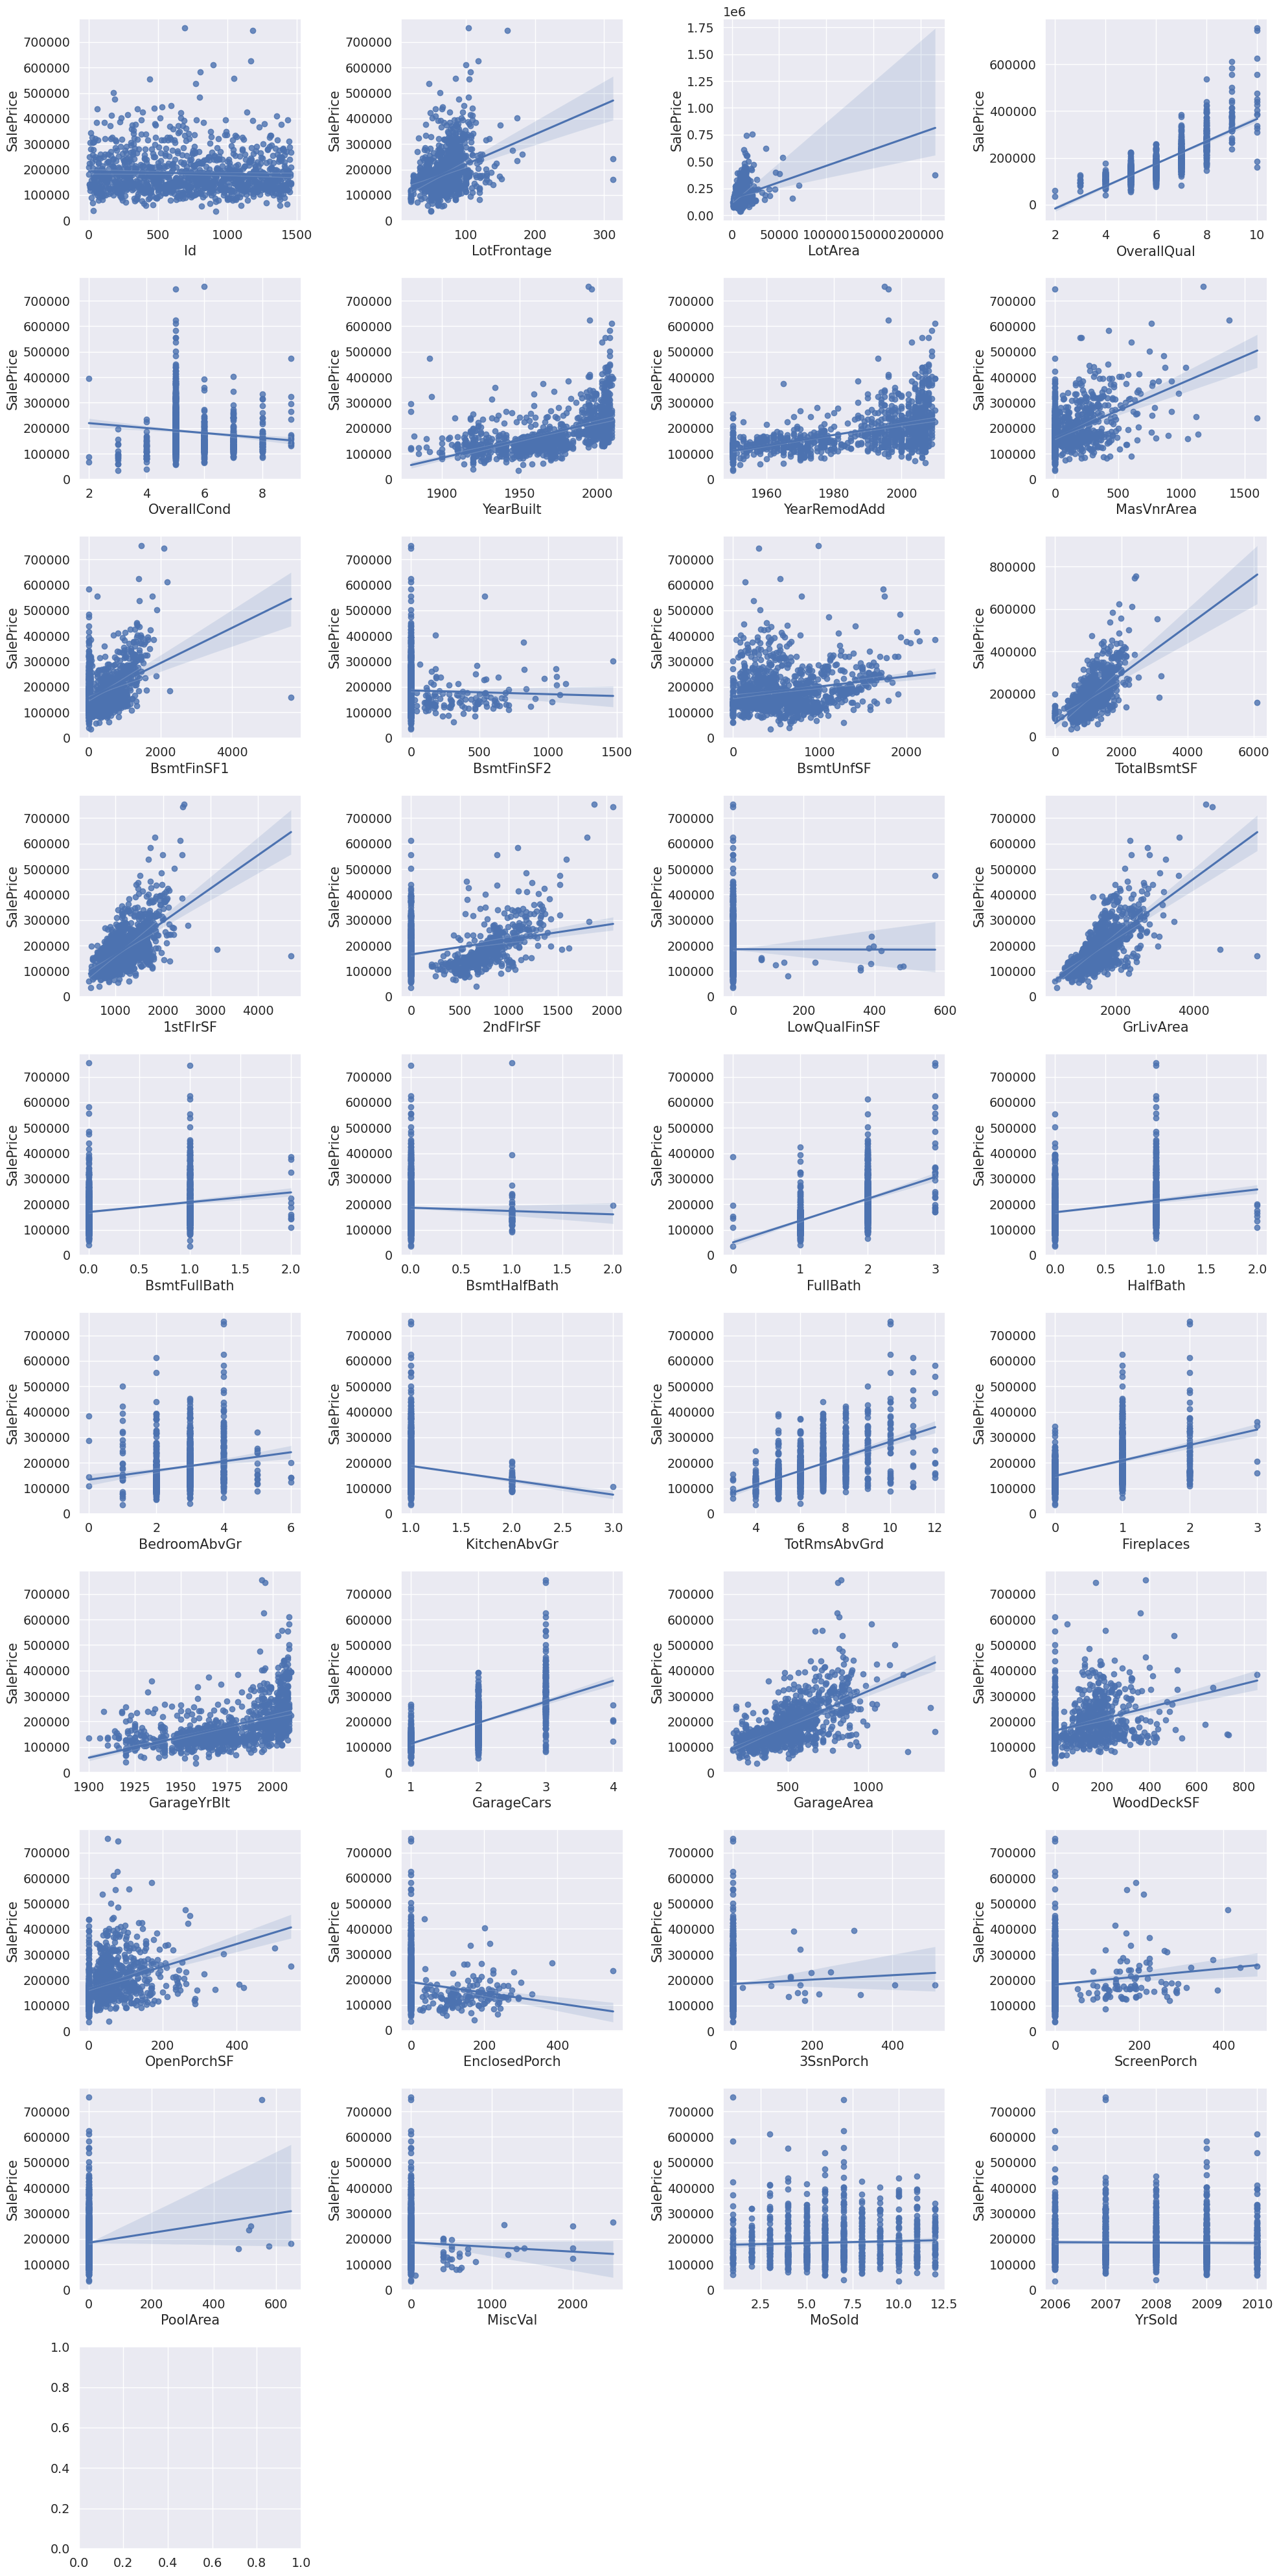

In [78]:
def plot_num_reg(show):
    if show:
        num_cols = len(numerical_cols)
        ncols = 4
        nrows = -(-num_cols // ncols)  # Ceiling division
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 40))
        axes = axes.flatten()

        # Remove 'SalePrice' from numerical_cols if it's there
        plot_cols = [col for col in numerical_cols if col != 'SalePrice']

        combined_data = pd.concat([train[plot_cols], train['SalePrice']], axis=1).dropna()

        for i, col in enumerate(plot_cols):
            sns.regplot(x=col, y='SalePrice', data=combined_data, ax=axes[i])

        # Remove unused subplots
        for i in range(num_cols, nrows * ncols):
            fig.delaxes(axes[i])

        plt.tight_layout()
        plt.show()

# Make sure to define 'show' as True or False before calling the function
show = True
plot_num_reg(show)


YrSold and MoSold have no correlation with the SalePrice and should be removed.

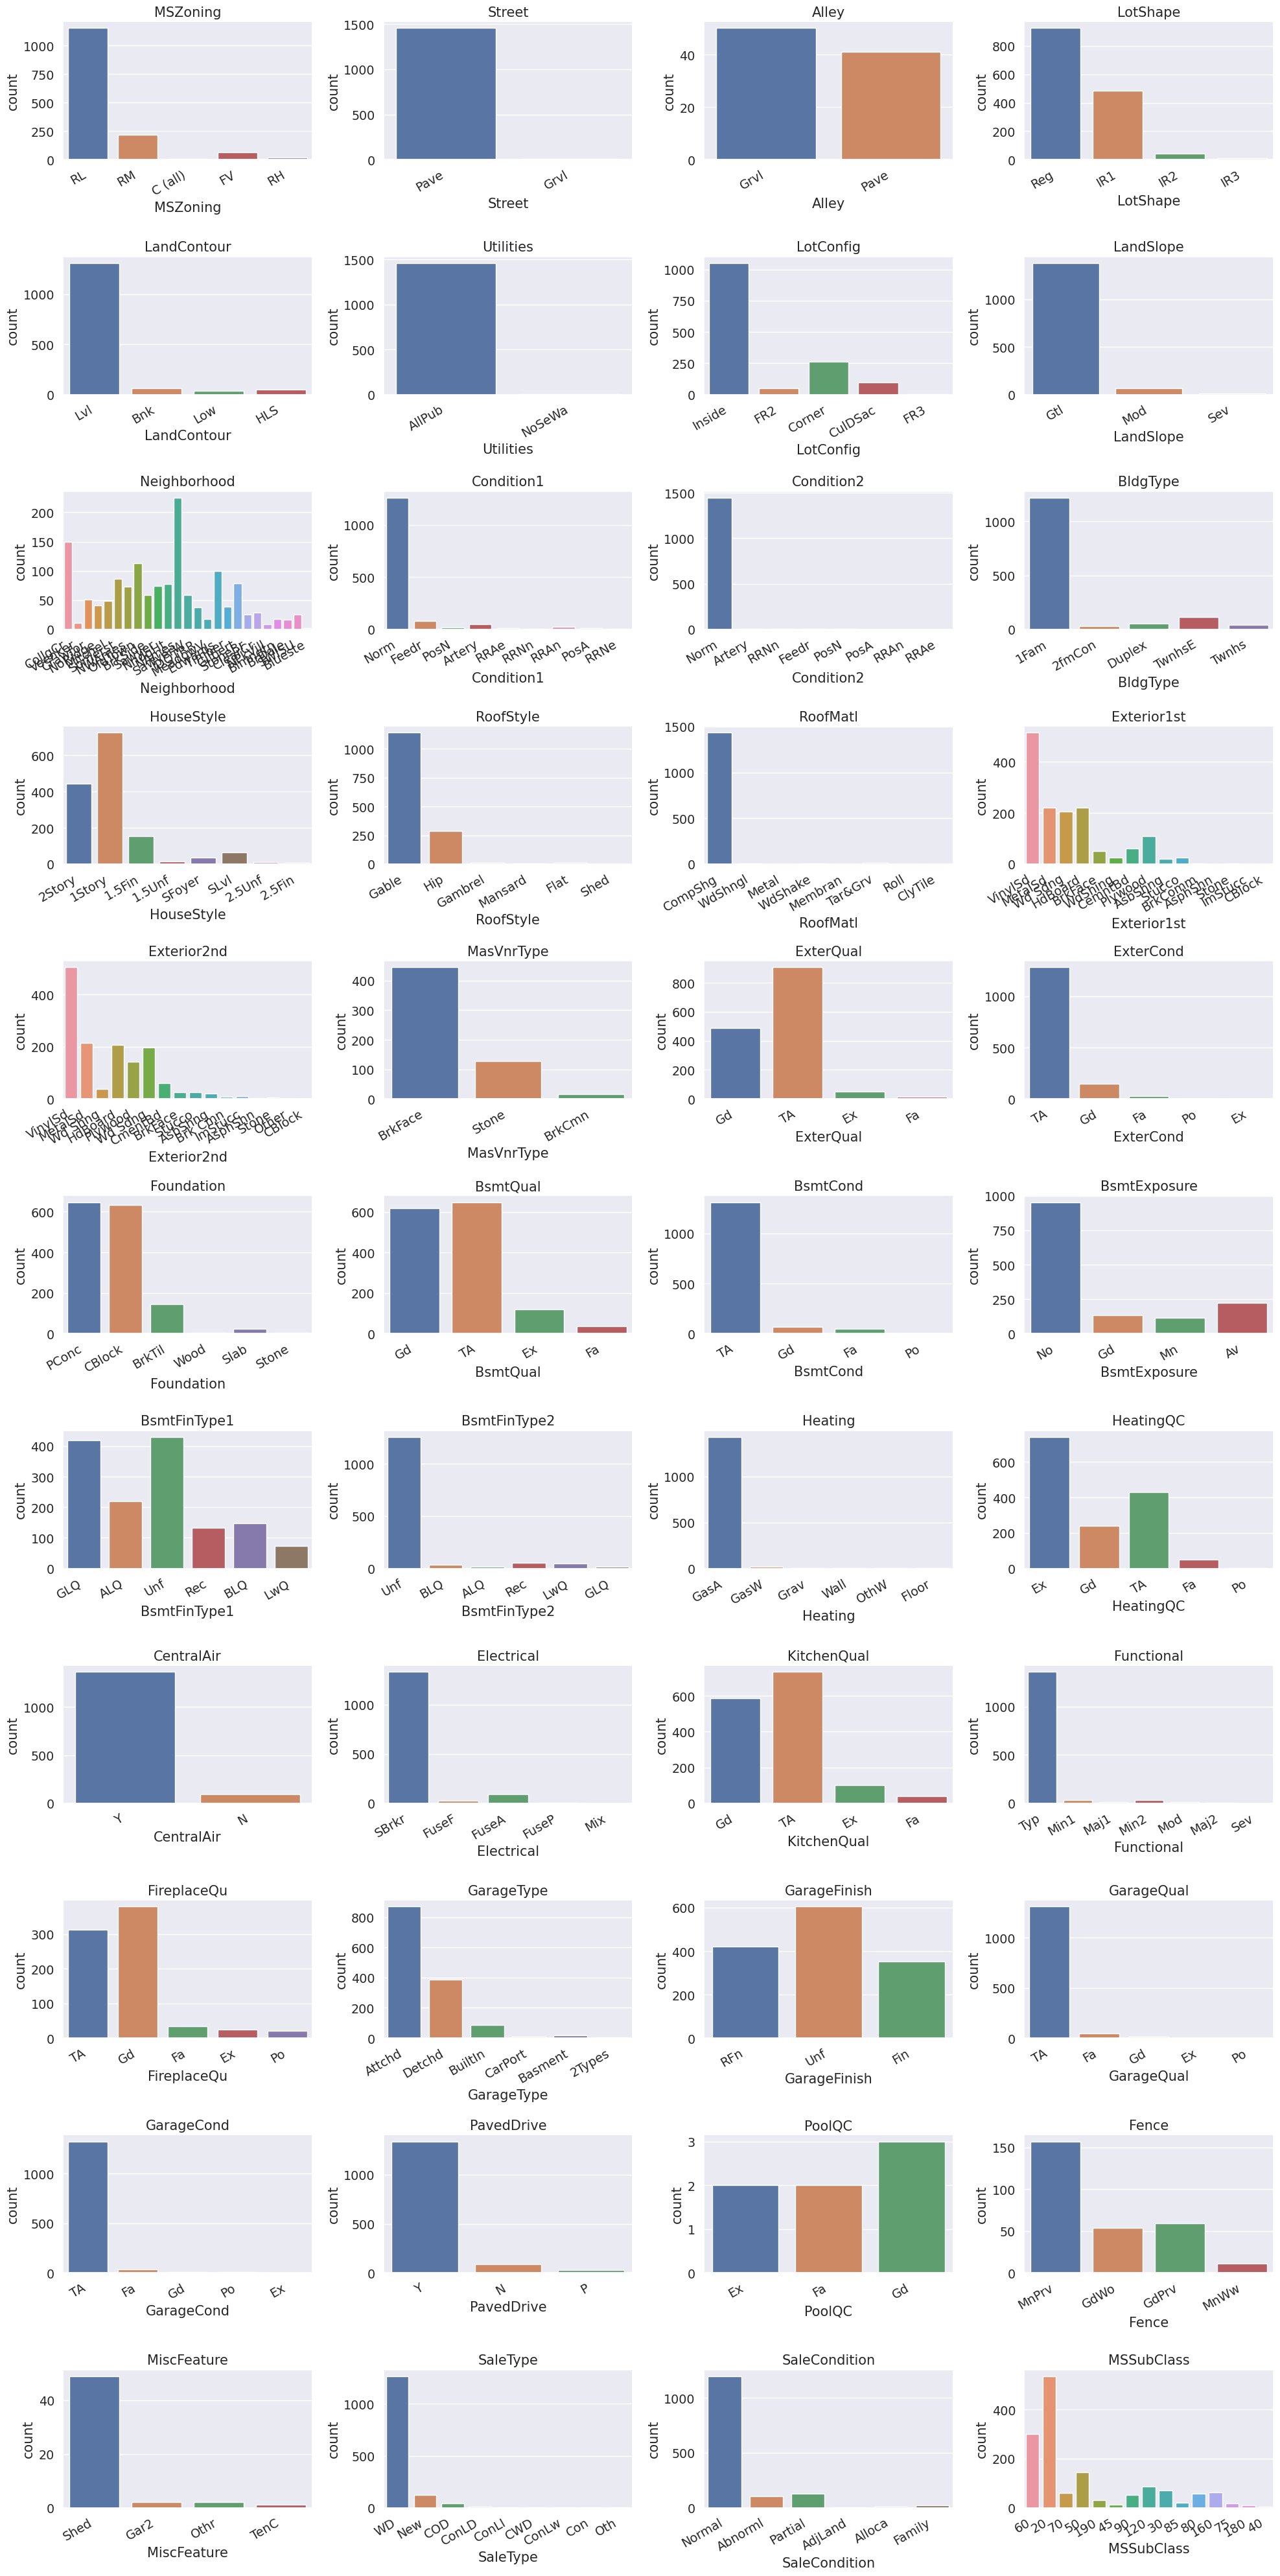

In [79]:
def plot_cat_count(show):
    if show:
        num_cols = len(categorical_cols)
        ncols = 4
        nrows = -(-num_cols // ncols)  # Ceiling division
        fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 40))
        axes = axes.flatten()

        for i, col in enumerate(categorical_cols):
            sns.countplot(data=train, x=col, ax=axes[i])
            axes[i].set_title(col)
            axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=30, ha='right')

        # Remove unused subplots
        for i in range(num_cols, nrows * ncols):
            fig.delaxes(axes[i])

        plt.tight_layout()
        plt.show()

# Make sure to define 'show' as True or False before calling the function
show = True
plot_cat_count(show)


In [80]:
overfit_cat = []
for i in categorical_cols:
    counts = train[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(train) * 100 > 95:
        overfit_cat.append(i)

overfit_cat = list(overfit_cat)
print(overfit_cat)

['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']


              Features
PoolQC        0.995205
MiscFeature   0.963014
Alley         0.937671
Fence         0.807534
MasVnrType    0.597260
FireplaceQu   0.472603
LotFrontage   0.177397
GarageYrBlt   0.055479
GarageCond    0.055479
GarageType    0.055479
GarageFinish  0.055479
GarageQual    0.055479
BsmtFinType2  0.026027
BsmtExposure  0.026027
BsmtQual      0.025342
BsmtCond      0.025342
BsmtFinType1  0.025342
MasVnrArea    0.005479
Electrical    0.000685


<Axes: ylabel='Features'>

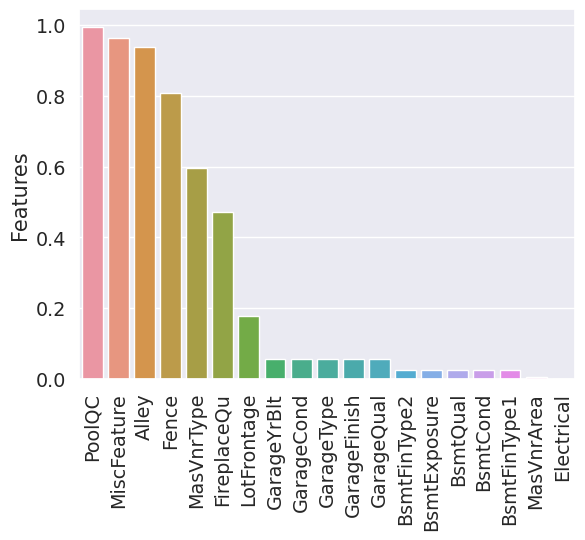

In [81]:
 # Proportion of missing (NA) values for each 

NA_df = pd.DataFrame({'Features':train.isnull().sum(axis = 0)/len(train)}).sort_values(by = 'Features',ascending = False)
NA_df = NA_df.loc[NA_df['Features']!=0]
print(NA_df)
plt.xticks(rotation='vertical')
sns.barplot(x=NA_df.index,y = NA_df.Features)

In [82]:
# Columns where NaN values have meaning e.g. no pool etc.
cols_fillna = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu',
               'GarageQual', 'GarageCond', 'GarageFinish', 'GarageType',
               'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType1', 'BsmtFinType2']

# Replace 'NaN' with 'None' in these columns
for col in cols_fillna:
    train[col].fillna('None', inplace=True)
    test[col].fillna('None', inplace=True)

# Fill missing values with median for LotFrontage
train['LotFrontage'].fillna(train['LotFrontage'].median(), inplace=True)
test['LotFrontage'].fillna(test['LotFrontage'].median(), inplace=True)

# Fill missing values with 0 for the following columns 
cols_fillzero = ['GarageArea', 'GarageCars', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea']
for col in cols_fillzero:
    train[col].fillna(0, inplace=True)
    test[col].fillna(0, inplace=True)

# Fill missing values with the mode for the following columns
cols_fillmode = ['MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Functional', 'Utilities']
for col in cols_fillmode:
    train[col].fillna(train[col].mode()[0], inplace=True)
    test[col].fillna(test[col].mode()[0], inplace=True)

# Check for any remaining missing values
missing_train = train.isnull().sum()
missing_test = test.isnull().sum()

missing_train = missing_train[missing_train > 0]
missing_test = missing_test[missing_test > 0]

missing_train, missing_test


(Series([], dtype: int64), Series([], dtype: int64))

In [83]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   object 
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [84]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [85]:
# Drop low correlation and quasi-constant features
drop_cols = ['YrSold', 'MoSold', 'LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'MiscVal', 'Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'PoolQC', 'MiscFeature']
train.drop(columns=drop_cols, inplace=True)
test.drop(columns=drop_cols, inplace=True)

In [86]:
# Identifying numeric features
numeric_features = train.select_dtypes(include=[int, float]).columns.tolist()

# Removing target variable 'SalePrice' if it's in the list of numeric features
if 'SalePrice' in numeric_features:
    numeric_features.remove('SalePrice')

# Finding common numeric columns between train and test datasets
common_numeric_cols = set(train.columns).intersection(test.columns, numeric_features)
common_numeric_cols_list = list(common_numeric_cols)

In [87]:
X = train.drop(columns=['SalePrice'])
y = train['SalePrice']

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [98]:
# Function to create pipeline with different preprocessing options
def create_pipeline(preprocessor):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('f_selector', SelectKBest(score_func=f_regression)),
        ('model', RandomForestRegressor(random_state=42))
    ])

# Numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Numeric transformer with normalization
numeric_transformer_normalized = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# Categorical transformer with One-Hot Encoding
onehot_categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Categorical transformer with Ordinal Encoding
ordinal_categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Column Transformers
preprocessor_onehot = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features), ('cat', onehot_categorical_transformer, categorical_features)])
preprocessor_ordinal = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features), ('cat', ordinal_categorical_transformer, categorical_features)])

# Pipelines
pipelines = [
    create_pipeline(preprocessor_onehot),
    create_pipeline(preprocessor_ordinal)
]

# Define hyperparameter grid
param_dist = {
    'model__n_estimators': [10, 50, 100, 200],
    'model__max_features': [1.0],
    'model__max_depth': [None, 10, 20, 30, 40],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'f_selector__k': ['all', 10, 20, 30]
}

# List to store results
results = []

# Perform hyperparameter tuning
for pipeline in pipelines:
    search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=-1)
    search.fit(X_train, y_train)
    results.append((search.best_params_, search.best_score_))

# Print results
for result in results:
    print(result)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
({'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 1.0, 'model__max_depth': None, 'f_selector__k': 'all'}, 0.8396579757591628)
({'model__n_estimators': 100, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 1.0, 'model__max_depth': 40, 'f_selector__k': 30}, 0.8454139723684959)


In [99]:
from sklearn.metrics import mean_squared_error, r2_score

preprocessor_ordinal_norm = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_normalized, numeric_features),  # Using the normalized numeric transformer
        ('cat', ordinal_categorical_transformer, categorical_features)
    ])

rf_model = RandomForestRegressor()

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor_ordinal_norm),
    ('model', rf_model)
])

# Update the hyperparameters
pipeline.set_params(
    model__n_estimators=100,
    model__min_samples_split=2,
    model__min_samples_leaf=1,
    model__max_features=1,
    model__max_depth=None
)


# Train the model
pipeline.fit(X_train, y_train)


# Make predictions
y_val_pred = pipeline.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_val_pred)
print("Mean Squared Error on Validation Data:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error on Validation Data:", rmse)

r2 = r2_score(y_val, y_val_pred)
print("R-squared Score on Validation Data:", r2)


Mean Squared Error on Validation Data: 1281902622.1596637
Root Mean Squared Error on Validation Data: 35803.66771937846
R-squared Score on Validation Data: 0.8328750841185195


In [90]:

import xgboost as xgb

# Function to create pipeline with different preprocessing options
def create_pipeline(preprocessor, model):
    return Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('f_selector', SelectKBest(score_func=f_regression)),
        ('model', model)
    ])

# Numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Numeric transformer with normalization
numeric_transformer_normalized = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# Categorical transformer with One-Hot Encoding
onehot_categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Categorical transformer with Ordinal Encoding
ordinal_categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# Column Transformers
preprocessor_onehot_std = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features), ('cat', onehot_categorical_transformer, categorical_features)])
preprocessor_onehot_norm = ColumnTransformer(transformers=[('num', numeric_transformer_normalized, numeric_features), ('cat', onehot_categorical_transformer, categorical_features)])
preprocessor_ordinal_std = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features), ('cat', ordinal_categorical_transformer, categorical_features)])
preprocessor_ordinal_norm = ColumnTransformer(transformers=[('num', numeric_transformer_normalized, numeric_features), ('cat', ordinal_categorical_transformer, categorical_features)])

# Create Pipelines for XGBoost
xgb_pipelines = [
    create_pipeline(preprocessor_onehot_std, xgb.XGBRegressor(random_state=42)),
    create_pipeline(preprocessor_onehot_norm, xgb.XGBRegressor(random_state=42)),
    create_pipeline(preprocessor_ordinal_std, xgb.XGBRegressor(random_state=42)),
    create_pipeline(preprocessor_ordinal_norm, xgb.XGBRegressor(random_state=42))
]

# Define the hyperparameter grid for XGBoost
xgb_param_dist = {
    'model__n_estimators': [10, 50, 100, 200],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 5, 10],
    'f_selector__k': ['all', 10, 20, 30]
}

# List to store results
xgb_results = []

# Perform hyperparameter tuning
for pipeline in xgb_pipelines:
    search = RandomizedSearchCV(pipeline, param_distributions=xgb_param_dist, n_iter=50, cv=5, verbose=1, random_state=42, n_jobs=-1)
    search.fit(X_train, y_train)
    xgb_results.append((search.best_params_, search.best_score_))

# Print results
for result in xgb_results:
    print(result)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
({'model__n_estimators': 200, 'model__max_depth': 3, 'model__learning_rate': 0.1, 'f_selector__k': 'all'}, 0.8446670082606834)
({'model__n_estimators': 200, 'model__max_depth': 3, 'model__learning_rate': 0.1, 'f_selector__k': 'all'}, 0.8446687412123639)
({'model__n_estimators': 200, 'model__max_depth': 5, 'model__learning_rate': 0.1, 'f_selector__k': 'all'}, 0.8517568232988921)
({'model__n_estimators': 200, 'model__max_depth': 5, 'model__learning_rate': 0.1, 'f_selector__k': 'all'}, 0.8513703877914474)


In [91]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np  # Make sure to import numpy

# Choose the best pipeline for XGBoost (using preprocessor_ordinal_norm as an example)
best_xgb_pipeline = create_pipeline(preprocessor_ordinal_norm, XGBRegressor(random_state=42))

# Update the XGBoost hyperparameters inside the pipeline
best_xgb_pipeline.set_params(
    model__n_estimators=200,
    model__max_depth=5,
    model__learning_rate=0.1,
    f_selector__k='all'  # Assuming feature selection should still be applied
)

# Train the model using the best pipeline and hyperparameters for XGBoost
best_xgb_pipeline.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred_xgb = best_xgb_pipeline.predict(X_val)

# Evaluate the model
mse_xgb = mean_squared_error(y_val, y_val_pred_xgb)
print("XGBoost - Mean Squared Error on Validation Data:", mse_xgb)
rmse_xgb = np.sqrt(mse_xgb)
print("XGBoost - Root Mean Squared Error on Validation Data:", rmse_xgb)
r2_xgb = r2_score(y_val, y_val_pred_xgb)
print("XGBoost - R-squared Score on Validation Data:", r2_xgb)


XGBoost - Mean Squared Error on Validation Data: 797220281.6556367
XGBoost - Root Mean Squared Error on Validation Data: 28235.08954573434
XGBoost - R-squared Score on Validation Data: 0.8960643576138081


In [92]:
import lightgbm as lgb

# Create Pipelines for LightGBM
lgb_pipelines = [
    create_pipeline(preprocessor_onehot_std, lgb.LGBMRegressor(random_state=42)),
    create_pipeline(preprocessor_onehot_norm, lgb.LGBMRegressor(random_state=42)),
    create_pipeline(preprocessor_ordinal_std, lgb.LGBMRegressor(random_state=42)),
    create_pipeline(preprocessor_ordinal_norm, lgb.LGBMRegressor(random_state=42))
]

# Define the hyperparameter grid for LightGBM
lgb_param_dist = {
    'model__n_estimators': [10, 50, 100, 200],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 5, 10],
    'f_selector__k': ['all', 10, 20, 30]
}

# List to store results
lgb_results = []

# Perform hyperparameter tuning
for pipeline in lgb_pipelines:
    search = RandomizedSearchCV(pipeline, param_distributions=lgb_param_dist, n_iter=50, cv=5, verbose=1, random_state=42, n_jobs=-1)
    search.fit(X_train, y_train)
    lgb_results.append((search.best_params_, search.best_score_))

# Print results
print("LightGBM Results:")
for result in lgb_results:
    print(result)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
LightGBM Results:
({'model__n_estimators': 200, 'model__max_depth': 3, 'model__learning_rate': 0.1, 'f_selector__k': 'all'}, 0.8528774004570077)
({'model__n_estimators': 200, 'model__max_depth': 3, 'model__learning_rate': 0.1, 'f_selector__k': 'all'}, 0.8533596754361712)
({'model__n_estimators': 200, 'model__max_depth': 3, 'model__learning_rate': 0.1, 'f_selector__k': 'all'}, 0.8618763719829436)
({'model__n_estimators': 200, 'model__max_depth': 3, 'model__learning_rate': 0.1, 'f_selector__k': 'all'}, 0.861506283423835)


In [93]:
from lightgbm import LGBMRegressor
# Choose the best pipeline for LightGBM (using preprocessor_ordinal_norm as an example)
best_lgb_pipeline = create_pipeline(preprocessor_ordinal_norm, LGBMRegressor(random_state=42))

# Update the LightGBM hyperparameters inside the pipeline
best_lgb_pipeline.set_params(
    model__n_estimators=200,
    model__max_depth=3,
    model__learning_rate=0.1,
    f_selector__k='all'  
)

# Train the model using the best pipeline and hyperparameters for LightGBM
best_lgb_pipeline.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred_lgb = best_lgb_pipeline.predict(X_val)

# Evaluate the model
mse_lgb = mean_squared_error(y_val, y_val_pred_lgb)
print("LightGBM - Mean Squared Error on Validation Data:", mse_lgb)
rmse_lgb = np.sqrt(mse_lgb)
print("LightGBM - Root Mean Squared Error on Validation Data:", rmse_lgb)
r2_lgb = r2_score(y_val, y_val_pred_lgb)
print("LightGBM - R-squared Score on Validation Data:", r2_lgb)


LightGBM - Mean Squared Error on Validation Data: 899131881.3164173
LightGBM - Root Mean Squared Error on Validation Data: 29985.527864561886
LightGBM - R-squared Score on Validation Data: 0.8827778823182347


In [94]:
# Make predictions on the test set
y_pred = best_xgb_pipeline.predict(test)

# Create a submission dataframe
submission = pd.DataFrame({
    "Id": test["Id"],  
    "SalePrice": y_pred
})


# Write the dataframe to a CSV file
submission.to_csv('submission.csv', index=False)


submission

Id      SalePrice
0     1461  124724.437500
1     1462  154741.046875
2     1463  186586.187500
3     1464  191618.968750
4     1465  202187.593750
...    ...            ...
1454  2915   84229.882812
1455  2916   87704.445312
1456  2917  183209.640625
1457  2918  112985.304688
1458  2919  220130.546875

[1459 rows x 2 columns]